In [1]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### With Context

In [5]:
data_path = 'inference_results_yes'
epoch_index = {
    'baseline':0.0,
    'checkpoint-18':0.1,
    'checkpoint-36':0.2,
    'checkpoint-54':0.3,
    'checkpoint-72':0.4,
    'checkpoint-90':0.5,
    'checkpoint-108':0.6,
    'checkpoint-126':0.7,
    'checkpoint-144':0.8,
    'checkpoint-162':0.9,
    'final_model':1.0,
}
files = os.listdir(f'../{data_path}/')
#files.remove('.ipynb_checkpoints')
files = np.unique([f.split('.')[0] for f in files])
files

array(['baseline', 'checkpoint-108', 'checkpoint-126', 'checkpoint-144',
       'checkpoint-162', 'checkpoint-18', 'checkpoint-36',
       'checkpoint-54', 'checkpoint-72', 'checkpoint-90', 'final_model'],
      dtype='<U14')

In [6]:
ACCURACY = []
CONFIDENCE = []
EPOCH = []
for file in files:
    epoch = epoch_index[file]
    confidence = np.load(f'../{data_path}/{file}.npy')
    with open(f'../{data_path}/{file}.json') as f: d = json.load(f)
    accuracy = d['accuracy']
    
    EPOCH.append(np.repeat(epoch, len(confidence)))    
    ACCURACY.append(np.repeat(accuracy, len(confidence)))
    CONFIDENCE.append(confidence)
EPOCH = np.concatenate(EPOCH)
ACCURACY = np.concatenate(ACCURACY)
CONFIDENCE = np.concatenate(CONFIDENCE)
vis_data = pd.DataFrame(np.c_[EPOCH, ACCURACY, CONFIDENCE], columns=['epoch', 'accuracy', 'confidence'])

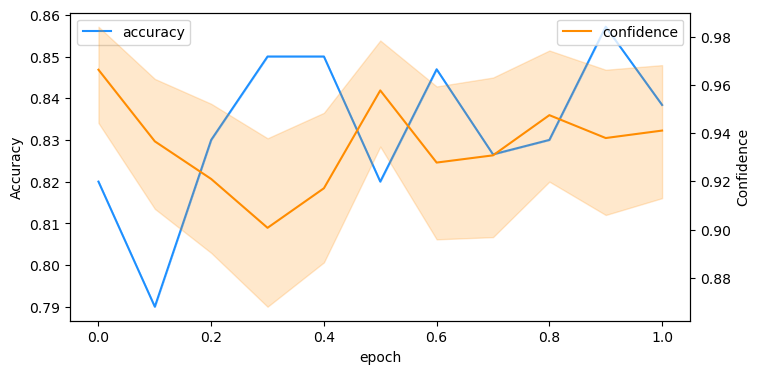

In [7]:
fig, ax1 = plt.subplots(figsize=(8, 4))
ax2 = ax1.twinx()
sns.lineplot(data=vis_data, x="epoch", y="accuracy", ax=ax1, color='dodgerblue', label='accuracy')
sns.lineplot(data=vis_data, x="epoch", y="confidence", ax=ax2, color='darkorange', label='confidence')
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Confidence')
plt.legend()
plt.show()
pass

### No Context

In [8]:
data_path = 'inference_results_no'
epoch_index = {
    'baseline':0.0,
    'checkpoint-18':0.1,
    'checkpoint-36':0.2,
    'checkpoint-54':0.3,
    'checkpoint-72':0.4,
    'checkpoint-90':0.5,
    'checkpoint-108':0.6,
    'checkpoint-126':0.7,
    'checkpoint-144':0.8,
    'checkpoint-162':0.9,
    'final_model':1.0,
}
files = os.listdir(f'../{data_path}/')
#files.remove('.ipynb_checkpoints')
files = np.unique([f.split('.')[0] for f in files])
files

array(['baseline', 'checkpoint-108', 'checkpoint-126', 'checkpoint-144',
       'checkpoint-162', 'checkpoint-18', 'checkpoint-36',
       'checkpoint-54', 'checkpoint-72', 'checkpoint-90', 'final_model'],
      dtype='<U14')

In [10]:
ACCURACY = []
CONFIDENCE = []
EPOCH = []
for file in files:
    epoch = epoch_index[file]
    confidence = np.load(f'../{data_path}/{file}.npy')
    with open(f'../{data_path}/{file}.json') as f: d = json.load(f)
    accuracy = d['accuracy']
    
    EPOCH.append(np.repeat(epoch, len(confidence)))    
    ACCURACY.append(np.repeat(accuracy, len(confidence)))
    CONFIDENCE.append(confidence)
EPOCH = np.concatenate(EPOCH)
ACCURACY = np.concatenate(ACCURACY)
CONFIDENCE = np.concatenate(CONFIDENCE)
vis_data = pd.DataFrame(np.c_[EPOCH, ACCURACY, CONFIDENCE], columns=['epoch', 'accuracy', 'confidence'])

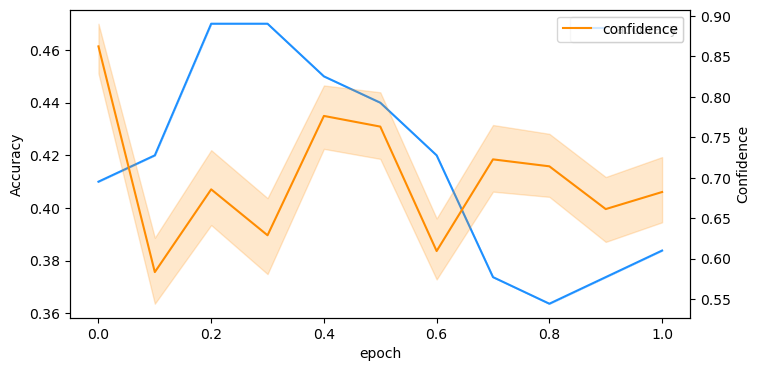

In [11]:
fig, ax1 = plt.subplots(figsize=(8, 4))
ax2 = ax1.twinx()
sns.lineplot(data=vis_data, x="epoch", y="accuracy", ax=ax1, color='dodgerblue', label='accuracy')
sns.lineplot(data=vis_data, x="epoch", y="confidence", ax=ax2, color='darkorange', label='confidence')
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Confidence')
plt.legend()
plt.show()
pass